# Model Calibration Performance

In [1]:
from pathlib import Path

import pandas as pd
import plotnine as p9
import plydata as ply

# Load the Calibration Performance Results

In [2]:
calibration_files = list(Path("output/calibration").rglob("*tsv"))

In [8]:
calibration_results_df = pd.concat(
    [
        pd.read_csv(file, sep="\t", index_col=0)
        >> ply.define(edge_type=f'{file.stem.split("_")[0]}')
        for file in calibration_files
    ]
)
calibration_results_df >> ply.slice_rows(10)

,true_proportion,prediction_proportion,label,edge_type
0,0.040179,0.062477,before_calibration,CbG
1,0.069364,0.138249,before_calibration,CbG
2,0.186441,0.239762,before_calibration,CbG
3,0.107143,0.338575,before_calibration,CbG
4,0.111111,0.447477,before_calibration,CbG
5,0.166667,0.514315,before_calibration,CbG
6,0.000000,0.639880,before_calibration,CbG
0,0.000000,0.081950,after_calibration,CbG
1,0.051502,0.154297,after_calibration,CbG
2,0.108696,0.241163,after_calibration,CbG


# Plot the calibration Plots

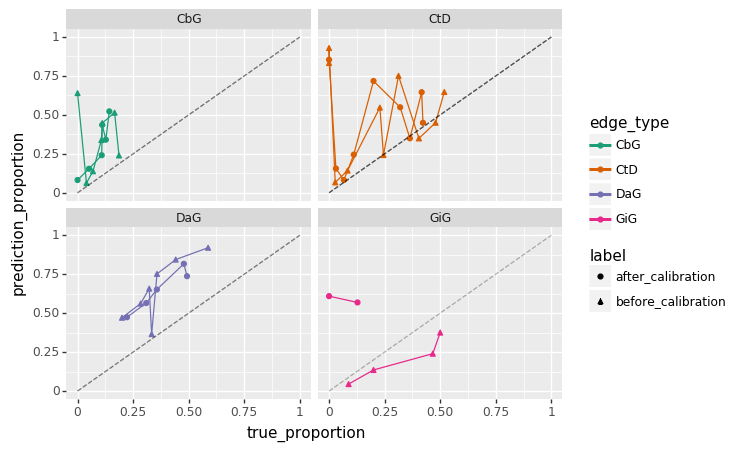

<ggplot: (-9223363288559514571)>


In [20]:
g = (
    p9.ggplot(
        calibration_results_df,
        p9.aes(
            x="true_proportion",
            y="prediction_proportion",
            group="label",
            shape="label",
            color="edge_type",
        ),
    )
    + p9.geom_point()
    + p9.geom_line()
    + p9.scale_color_brewer(type="qual", palette=2)
    + p9.scale_y_continuous(limits=[0, 1])
    + p9.scale_x_continuous(limits=[0, 1])
    + p9.geom_segment(
        x=0, xend=1, y=0, yend=1, color="black", linetype="dashed", alpha=0.05
    )
    + p9.facet_wrap("~ edge_type")
)
print(g)